# Neural Network from scratch with Numpy and Math (No Pytorch, Tensorflow)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import w3_tools

## A. Lets create fake data 

In [2]:
np.random.seed(3)

In [3]:
m = 50 # lets have 50 training examples
X, Y = make_regression(n_samples=m, n_features=1, noise=30
                       , random_state=1) # doc isnt working

In [4]:
X = X.reshape((1, m)) 
Y = Y.reshape((1, m))

In [5]:
print("Training X [input] values")
print(X)
print("Training Y [output] values")
print(Y)

Training X [input] values
[[-0.24937038  0.19091548 -0.68372786 -0.17242821  2.10025514 -0.19183555
  -0.61175641  1.6924546   0.50249434  1.74481176 -2.3015387   0.2344157
   0.74204416 -0.12289023 -0.84520564 -0.88762896 -0.87785842  0.86540763
  -0.52817175 -0.63699565  0.05080775  1.14472371 -1.07296862 -0.7612069
   0.90159072 -2.06014071  0.53035547 -0.67124613  1.13376944 -0.93576943
  -1.11731035 -0.3224172   1.65980218  0.90085595  0.58281521  1.62434536
  -1.09989127 -0.38405435 -1.10061918 -0.74715829  0.61720311 -0.0126646
   0.3190391   1.46210794 -0.69166075  0.12015895 -0.39675353  0.04221375
  -0.26788808 -0.6871727 ]]
Training Y [output] values
[[ -47.97548493   37.79243616  -59.64300643  -17.68190049  171.87364139
    51.57552253  -17.76469014  104.55575843   76.75145363  198.63761009
  -197.51566664   33.83053368   54.73018606   10.42576826  -70.92401704
   -29.533659    -60.41825981   95.8299159   -10.26614364  -43.67368501
     6.39291443   97.0571715  -119.6624150

## B. Now lets draw a scatter plot

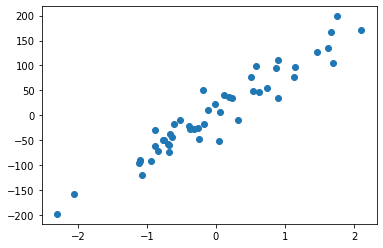

In [32]:
plt.scatter(X, Y) # BEAUTIFUL!!!

# C.

## Step 1: Analysis

In [12]:
X_shape = X.shape
Y_shape = Y.shape

In [13]:
X_shape, Y_shape # :D

((1, 50), (1, 50))

# Step 2: Neural Network Planning

### The neural network type will be a linear regression one
### y= Wx+b (where w and b are the paremeters)

### Functions that we'll be using:
* layer_sizes(x,y) - umm takes input and out and outputs layer size of the network lets implement
* initialize_params(SIZE_X, SIZE_Y) - takes size of neural network and initializes random variables of W and b
* forward_propagation(X, parameters)
* compute_cost(Y_hat, Y)
* backpropagation [this'll be done by sklearn not me :)]


In [14]:
def layer_sizes(X, Y):
    
    SIZE_X, SIZE_Y = X.shape[0], Y.shape[0]

    return SIZE_X, SIZE_Y

print(layer_sizes(X, Y))

(1, 1)


In [15]:
def initialize_params(SIZE_X, SIZE_Y):
    """
    @size_x: Numpy shape of all the X values
    @size_y: Numpy shape of all the Y values
    Takes in Size of Neural net
    """
  
    W = np.random.randn(SIZE_Y, SIZE_X) * 0.01
    b = np.zeros((SIZE_Y, 1))
    
    if (b.shape != ((SIZE_Y, 1))):
        print("Nah bruh it doesnt")
    
    params = {"W": W, "b": b}
    
    return params

### testing time

In [16]:
n_x, n_y = layer_sizes(X,Y)

In [17]:
parameters = initialize_params(n_x, n_y)

In [18]:
def forward_propagation(X, parameters):
    """
    @x: All input training values 
    @parameters: random generated values of W and b
    """
    W = parameters['W']
    b = parameters['b']
    
    # now dot product
    
    # y_hat = Wx + b
   
    Z = W.dot(X) + b
    y_hat = Z
    
    return y_hat 

In [19]:
Y_hat = forward_propagation(X, parameters)
Y_hat

array([[-0.00446031,  0.00341477, -0.01222935, -0.0030841 ,  0.03756576,
        -0.00343123, -0.01094205,  0.03027172,  0.00898776,  0.0312082 ,
        -0.04116598,  0.00419283,  0.01327241, -0.00219805, -0.01511759,
        -0.01587638, -0.01570163,  0.01547893, -0.00944703, -0.01139349,
         0.00090876,  0.02047485, -0.01919142, -0.01361516,  0.01612611,
        -0.03684826,  0.00948609, -0.0120061 ,  0.02027892, -0.01673744,
        -0.01998453, -0.00576685,  0.02968769,  0.01611297,  0.0104244 ,
         0.0290535 , -0.01967297, -0.00686931, -0.01968599, -0.01336389,
         0.01103947, -0.00022652,  0.00570642,  0.02615168, -0.01237124,
         0.0021492 , -0.00709645,  0.00075505, -0.00479152, -0.01229097]])

## Cost Function formula
$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [30]:
def compute_cost(Y_hat, Y):
    """
    Y_hat - The Y values we estimated from 
    """
    m = Y.size
    scale = 1/2*m
    difference = (Y_hat - Y)**2
    cost = scale * np.mean(difference) 
    return cost

In [34]:
print("Current cost of NN: ", compute_cost(Y_hat, Y))

Current cost of NN:  180590.99845926484


## Backpropagation

In [75]:
parameters = w3_tools.train_nn(parameters, Y_hat, X, Y) # yayyy

# I am done
# Final Neural Network Combination

In [76]:
def nn_model(X, Y, num_of_iterations=10, print_cost=False):
    """
    @x
    @y
    @num_of_iterations
    
    General steps
    layer_sizes(x,y) - umm takes input and out and outputs layer size of the network lets implement
    initialize_params(SIZE_X, SIZE_Y) - takes size of neural network and initializes random variables of W and b
    forward_propagation(X, parameters)
    compute_cost(Y_hat, Y)
    """
    
    # Step 1 define size
    size_x, size_y = layer_sizes(X, Y)
    
    
    # Step 2: Initialize parameters for the regression y = mx+c / y = wx +b
    parameters = initialize_params(size_x, size_y)
    
    for i in range(0, num_of_iterations):
    
        # Step 3: Perform forward propagation aka matrix multiplacation
        Y_hat = forward_propagation(X, parameters) # Y_hat is the estimated value by the params

        # Step 4: compute cost, to find out how bad or good our Y_hat is compared to the actual Y
        cost = compute_cost(Y_hat, Y)
        
        # Step 5 : BACKPROPAGATION AHAHHAAHAAAAA
        parameters = w3_tools.train_nn(parameters, Y_hat, X, Y) # UPDATE PARAMS
        
        if print_cost:
            print(f"On iteration {i}")
            print(f"The Cost was {cost}.") 
            
    return parameters

# I think my neural network is done time to test on the data

In [77]:
# lets use the fake (easy) data then
parameters = nn_model(X, Y, num_of_iterations=10, print_cost=True)

On iteration 0
The Cost was 180734.73902741712.
On iteration 1
The Cost was 17632.82374760863.
On iteration 2
The Cost was 14984.28423365888.
On iteration 3
The Cost was 14930.034512355885.
On iteration 4
The Cost was 14928.496057134775.
On iteration 5
The Cost was 14928.439553804756.
On iteration 6
The Cost was 14928.437198383584.
On iteration 7
The Cost was 14928.437095485655.
On iteration 8
The Cost was 14928.437090920783.
On iteration 9
The Cost was 14928.437090717285.


In [78]:
# i want to plot y=mx+c shit docs
W_simple, b_simple = parameters['W'], parameters['b']

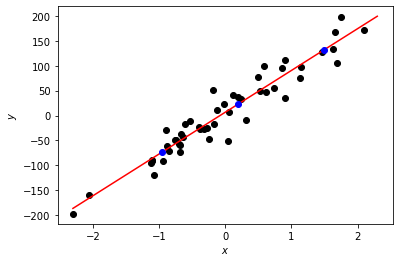

In [79]:
X_pred = np.array([-0.95, 0.2, 1.5])

fig, ax = plt.subplots()
plt.scatter(X, Y, color = "black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
ax.plot(X_line, W_simple[0,0] * X_line + b_simple[0,0], "r")
ax.plot(X_pred, W_simple[0,0] * X_pred + b_simple[0,0], "bo")
plt.plot()
plt.show()

# LETS GO :D sorry